In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df=pd.read_csv("Perfect2.csv")

a=np.zeros(len(df.storage))
for i in np.arange(len(df.storage)):
    a[i]=float(df.storage[i].strip("[]"))
df.storage=a
df=df.iloc[1:,]
df=df.drop_duplicates(subset=['energy','effi'], keep='last').reset_index()


df.loc[df.power<= 10100, 'power'] = np.nan


factorc=0.5
df.power= df.power*factorc/df.effi+ df.power*(1-factorc)

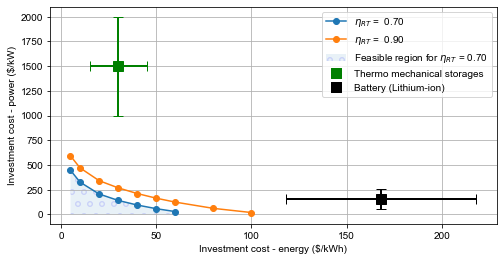

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['figure.figsize']

df.loc[df.power<= 10100, 'power'] = np.nan
import numpy as np
plt.figure(figsize=(8,4))
for i in np.unique(df.effi):
    plt.plot(df.energy[df.effi==i]/1000,df.power[df.effi==i]/1000,'-o',label='$\eta_{RT}$ = % 0.2f' % i)

    
i=0.7
y2=df.power[df.effi==i]/1000
plt.fill_between(df.energy[df.effi==i]/1000,0,y2,alpha=0.1, hatch="o", edgecolor="b", linewidth=0.0, label= 'Feasible region for $\eta_{RT}$ = 0.70')


#plt.title('Perfect Storage')
plt.xlabel('Investment cost - energy ($/kWh)')
plt.ylabel('Investment cost - power ($/kW)')
plt.grid()

plt.errorbar(30, 1500,
             yerr = 500,
             xerr = 15,
             fmt ='sg',elinewidth=2, capsize=5,markersize='10', label= 'Thermo mechanical storages')

plt.errorbar(168, 156,
             yerr = 100,
             xerr = 50,
             fmt ='sk',elinewidth=2,  capsize=5,markersize='10',label='Battery (Lithium-ion)')


plt.legend()

plt.savefig("CurrentMarket.jpg",dpi=600,bbox_inches='tight')
plt.show()
